In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/anime.csv")


In [3]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
data.shape

(12294, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


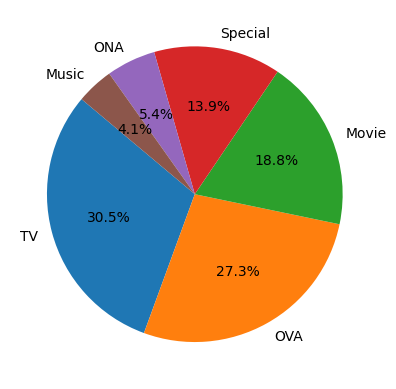

In [11]:

b=data['type'].value_counts()
b

labels = ['TV', 'OVA', 'Movie', 'Special','ONA','Music']
plt.pie(b, labels=labels, autopct='%1.1f%%', startangle=140)

### checking for different genre

data['genre'] = data['genre'].apply(lambda x: x.split(', '))


<class 'pandas.core.series.Series'>
Index: 12017 entries, 0 to 12293
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
12017 non-null  float64
dtypes: float64(1)
memory usage: 187.8 KB


-0.5443140848094782

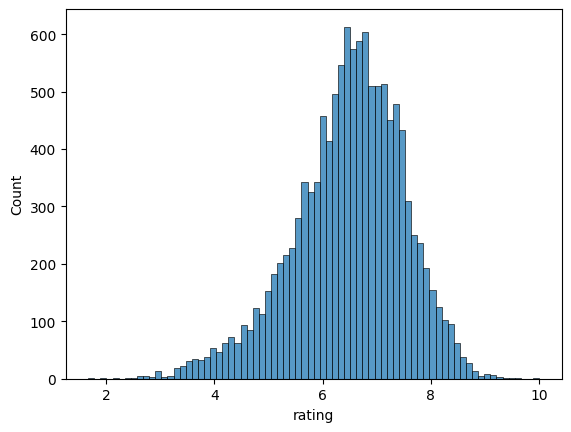

In [12]:
data

data['rating'].info()

### lets check the distribution of the rating

sns.histplot(data['rating'])

### lets check the skewness of the plot

data['rating'].skew()

### the data is moderately distributed

In [13]:

data['genre']
exploded_series = data['genre'].explode()
unique_elements = exploded_series.unique()

print(unique_elements)

['Drama' 'Romance' 'School' 'Supernatural' 'Action' 'Adventure' 'Fantasy'
 'Magic' 'Military' 'Shounen' 'Comedy' 'Historical' 'Parody' 'Samurai'
 'Sci-Fi' 'Thriller' 'Sports' 'Super Power' 'Space' 'Slice of Life'
 'Mecha' 'Music' 'Mystery' 'Seinen' 'Martial Arts' 'Vampire' 'Shoujo'
 'Horror' 'Police' 'Psychological' 'Demons' 'Ecchi' 'Josei' 'Shounen Ai'
 'Game' 'Dementia' 'Harem' 'Cars' 'Kids' 'Shoujo Ai' 'Hentai' 'Yaoi'
 'Yuri']


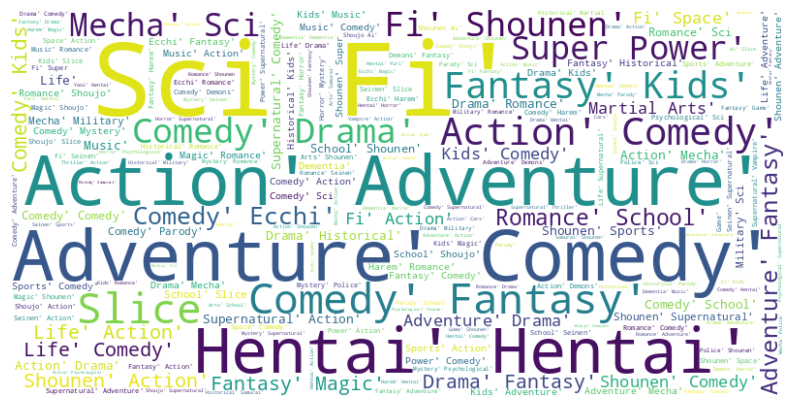

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Convert NaN values to empty strings
data['genre'] = data['genre'].fillna('')

# Concatenate all genres into a single string
all_genres = ' '.join(data['genre'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


anime_data = pd.read_csv("/content/anime.csv")

anime_data['genre'] = anime_data['genre'].fillna('')
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [18]:
# Create a binary genre matrix
genres = set(genre for sublist in anime_data['genre'] for genre in sublist)
for genre in genres:
    anime_data[genre] = anime_data['genre'].apply(lambda x: 1 if genre in x else 0)



 #Drop unnecessary columns
anime_data.drop(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], axis=1, inplace=True)

# Calculate cosine similarity between items (anime)
item_similarity = cosine_similarity(anime_data)

# Convert the cosine similarity matrix into a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=anime_data.index, columns=anime_data.index)

def get_similar_anime(anime_id, top_n=5):
    # Get similarity scores for the given anime
    similar_anime = item_similarity_df.loc[anime_id].sort_values(ascending=False)[1:top_n+1]
    return similar_anime

# Example usage:
similar_anime = get_similar_anime(anime_id=60, top_n=5)
print(similar_anime)



3089    0.973329
3544    0.973329
4418    0.973329
5805    0.971825
0       0.971825
Name: 60, dtype: float64


In [ ]:
1. Can you explain the difference between user-based and item-based collaborative filtering?

USER BASED -
             1.User-based filtering compares users to find similar individuals and bases recommendations on what those similar users liked.
             2.Less scalable as the number of users increases.
             3.Based on user-user similarity.
 ITEM BASED -
             1.Item-based filtering compares items to find similar products and bases recommendations on the user’s interactions with those items.
             2.More scalable since the number of items is typically smaller than users.
             3.Based on item-item similarity.

In [ ]:
2. What is collaborative filtering, and how does it work? give me answer

Defination-
            Collaborative filtering is a recommendation technique that relies on the shared experiences of a community of users. It predicts user preferences based on their past interactions and the behaviors of similar users or items.
How It Works-
             Collaborative filtering operates by analyzing user-item interactions in the form of a user-item matrix. It identifies patterns in this data to make recommendations.

            